# Lab 2. Files and figures
### Adrian Marziliano

#### Computational Methods for Geoscience - EPS 400/522
#### Instructor: Eric Lindsey
---------

When you are done with the lab, export it as an HTML or PDF file (File menu -> Save and export as), and turn it in along with your beautiful PDF map from question 5.

---------

In [ ]:
pip install basemap

In [ ]:
pip install cartopy

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc

from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
from datetime import datetime

### Assignment 1: Ask the user for a number, then print the factorial of that number (Use np.math.factorial)

In [2]:
user_number = int(input("Please enter a number: "))
user_output = np.math.factorial(user_number)
print("The factorial for your input is", user_output)

The factorial for your input is 24


### Assignment 2: Download and read in a csv file of recent earthquakes

Go to [USGS Earthquake Catalog](https://earthquake.usgs.gov/earthquakes/search/) and conduct a search of your choice, but make sure it contains at least 1 magnitude 7 or larger event.

Under 'output options' change the format to 'CSV', it should download directly to your computer.

Now, read this file into python using Pandas, and print out just the 'time', 'latitude', 'longitude', 'depth' and 'mag' columns, for only the earthquakes over magnitude 7.

Hint: if you have a pandas data frame with lots of columns and only want to print some, you can give a list of just the ones you want to print like so:

    print(data[['col1','col2','col3']])

                         time  longitude  latitude  depth  mag
0    2010-12-15T18:22:23.540Z    -69.143   -17.679  136.6  5.1
1    2010-12-13T18:51:05.360Z    -73.080   -33.989   29.3  5.2
2    2010-11-29T19:57:53.880Z    -66.712   -24.012  182.1  5.2
3    2010-11-28T08:19:45.000Z    -72.043   -34.672   41.9  5.3
4    2010-11-25T04:54:46.000Z    -69.793   -25.060   28.7  5.0
..                        ...        ...       ...    ...  ...
437  2010-01-20T19:07:38.720Z    -65.809   -57.773   10.0  5.1
438  2010-01-19T17:28:15.360Z    -65.829   -27.584   26.8  5.2
439  2010-01-18T12:28:34.930Z    -68.599   -31.355   94.1  5.4
440  2010-01-17T12:00:01.080Z    -65.879   -57.664    5.0  6.3
441  2010-01-05T01:34:25.430Z    -74.034   -16.481   28.0  5.1

[442 rows x 5 columns]


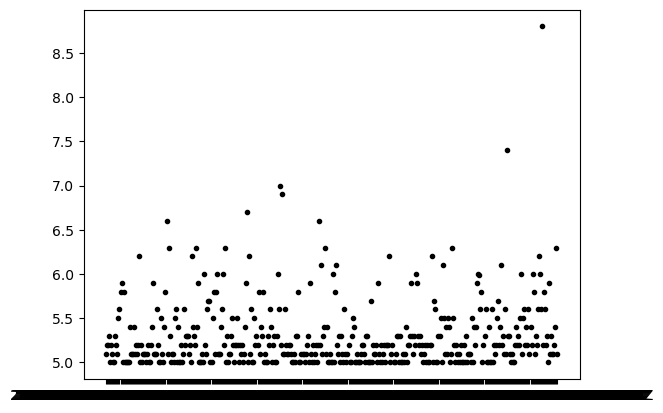

In [3]:
# Read in all data and make a quick plot.
data1=pd.read_csv('USGS_ChileEarthquakes_2010.csv')
print(data1[['time', 'longitude', 'latitude','depth', 'mag']])
plt.plot(data1['time'],data1['mag'],'k.') # notice I set the marker to black dots with 'k.'
plt.show()

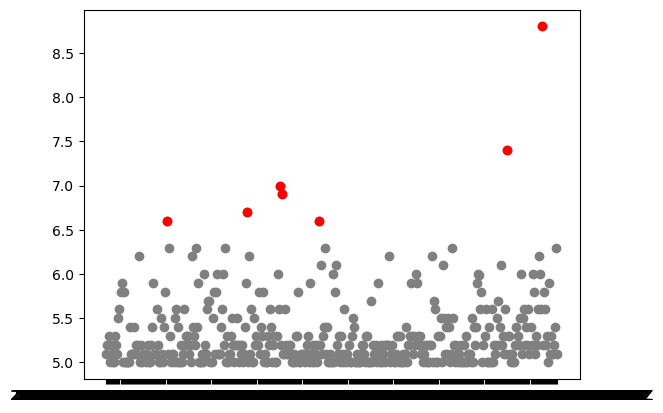

In [4]:
# Filter data to earthquakes with magnitudes higher than 6.5 (changed to include more earthquakes)
data1 = data1[['time', 'latitude', 'longitude', 'depth', 'mag']]
data1_filtered = data1[data1['mag'] >= 6.5]

# Scatter plot of filtered data against total earthquakes for the year
plt.scatter(data1['time'],data1['mag'], color='grey')
plt.scatter(data1_filtered['time'], data1_filtered['mag'], color='red')

### Assignment 3: plotting earthquakes

Plot the earthquakes from your USGS query above. The X and Y axes of the plot should be longitude and latitude, but you can choose how to represent depth, magnitude, time, etc. (choose at least 1 of these to represent). You could use color, marker size, 3D heights, etc. Don't go too crazy, but have fun! Take a look at some demos here, maybe copy one you like and modify it to your use: [MatPlotLib](https://matplotlib.org/stable/gallery/index.html)

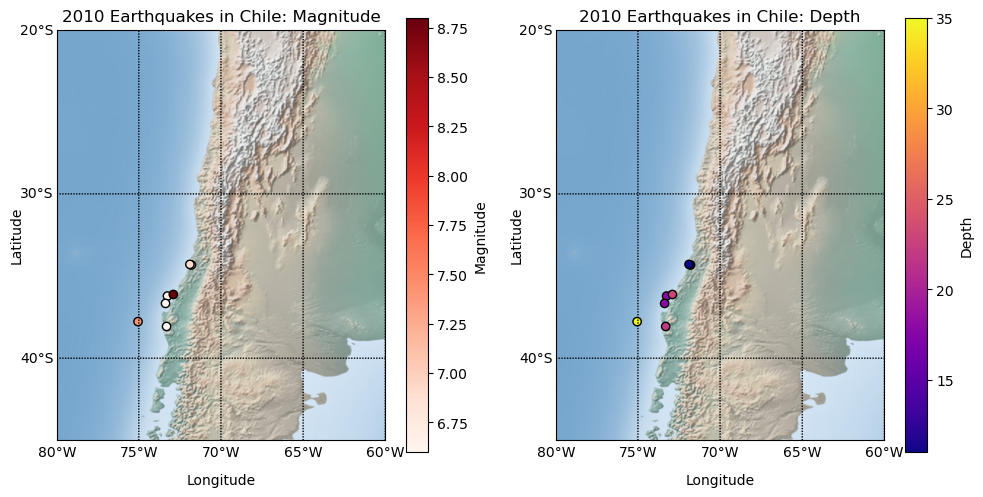

In [5]:
from mpl_toolkits.basemap import Basemap

# Set parameters for scatter plots
lons = data1_filtered['longitude']
lats = data1_filtered['latitude']
mag = data1_filtered['mag']
dep = data1_filtered['depth']

# Calculate the extent of the data for the basemap
#min_lon, max_lon = min(lons), max(lons)
#min_lat, max_lat = min(lats), max(lats)
min_lon, max_lon = -80, -60
min_lat, max_lat = -45, -20

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Create the basemap for both subplots using the calculated extent
for ax in axes:
    m = Basemap(projection='cyl', ax=ax, llcrnrlon=min_lon, llcrnrlat=min_lat, urcrnrlon=max_lon, urcrnrlat=max_lat)
    m.shadedrelief()
    m.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=10)  # Add latitude tick labels
    m.drawmeridians(np.arange(-180., 181., 5.), labels=[0,0,0,1], fontsize=10)  # Add longitude tick labels
    
# Create the first scatterplot with a colormap
sc1 = axes[0].scatter(lons, lats, c=mag, cmap='Reds', edgecolor='k')
axes[0].set_title('2010 Earthquakes in Chile: Magnitude')

# Create the second scatterplot with a different colormap
sc2 = axes[1].scatter(lons, lats, c=dep, cmap='plasma', edgecolor='k')
axes[1].set_title('2010 Earthquakes in Chile: Depth')

# Add colorbars for both scatterplots
cbar1 = fig.colorbar(sc1, ax=axes[0], orientation='vertical')
cbar1.set_label('Magnitude')
cbar2 = fig.colorbar(sc2, ax=axes[1], orientation='vertical')
cbar2.set_label('Depth')

# Set common labels for the subplots
for ax in axes:
    ax.set_xlabel('Longitude', labelpad=20)
    ax.set_ylabel('Latitude', labelpad=20)

plt.tight_layout()

### Assignment 4: Working with datetime

Plot the earthquake magnitudes from your query over time, making sure to take care of the 'datetime' formatting of both the data and the x-axis of the plot.

Hint: import the module 'datetime' and then use the function datetime.datetime.strptime() to convert the string-formatted dates into datetime objects.

This one may be tricky - use chatgpt or the datetime documentation to help!

In [6]:
data1_filtered['time']

59     2010-07-14T08:32:21.490Z
138    2010-03-16T02:21:57.940Z
170    2010-03-11T14:55:27.510Z
172    2010-03-11T14:39:43.950Z
208    2010-03-05T11:47:06.820Z
392    2010-02-27T08:01:23.010Z
426    2010-02-27T06:34:11.530Z
Name: time, dtype: object

In [7]:
# Convert 'time' column to proper string format for datetime.strptime()
# Option 1
date_string = ', '.join(data1_filtered['time'].tolist())
date_strings1 = date_string.split(', ')

# Option 2
date_strings2 = (', '.join(data1_filtered['time'].tolist())).split(', ')

print(date_strings1, date_strings2)

['2010-07-14T08:32:21.490Z', '2010-03-16T02:21:57.940Z', '2010-03-11T14:55:27.510Z', '2010-03-11T14:39:43.950Z', '2010-03-05T11:47:06.820Z', '2010-02-27T08:01:23.010Z', '2010-02-27T06:34:11.530Z'] ['2010-07-14T08:32:21.490Z', '2010-03-16T02:21:57.940Z', '2010-03-11T14:55:27.510Z', '2010-03-11T14:39:43.950Z', '2010-03-05T11:47:06.820Z', '2010-02-27T08:01:23.010Z', '2010-02-27T06:34:11.530Z']


Text(0, 0.5, 'Magnitude')

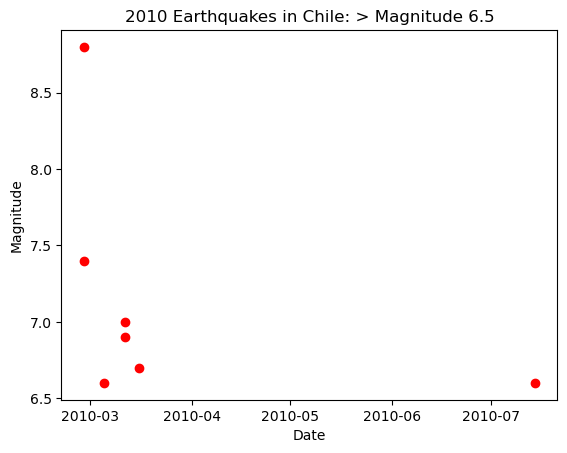

In [8]:
# Define the format of the input string
format_string = "%Y-%m-%dT%H:%M:%S.%fZ"

# Input 'time' column from dataframe, in string format, split, and separated with commas
date_strings = (', '.join(data1_filtered['time'].tolist())).split(', ')

# Input string containing date and time information
#date_string = time_str # Replace with your date string

# Convert each date string to a datetime object
datetime_objects = []

for date_string in date_strings:
    datetime_obj = datetime.strptime(date_string, format_string)
    datetime_objects.append(datetime_obj) 

# Plot magnitude > 6.5 against time using datetime objects
plt.scatter(datetime_objects, mag, color='red')
plt.title('2010 Earthquakes in Chile: > Magnitude 6.5')
plt.xlabel('Date')
plt.ylabel('Magnitude')

### Assignment 5: Make a beautiful SST plot
Download the full monthly timeseries of sea surface temperatures from 1891 to present ('sst.mon.mean.nc', 156 MB) from [NOAA Physical Sciences Labratory](https://downloads.psl.noaa.gov/Datasets/COBE/).

Create a beautiful plot of last month's SST map, and use plt.savefig() to save it as a PDF to turn in alongside the lab. I will share my favorite next week - use creative colorschemes, plotting methods, or anything else unexpected!


In [ ]:
import os
from pathlib import Path

# Get current working directory
current_directory = os.getcwd()
print(f"Current Directory: {current_directory}")

In [9]:
# For PC
#file = 'C:/Users/marzi/Downloads/sst.mon.mean.nc'

# For MAC
file_path = '/Users/Adrian/Downloads/sst.mon.mean.nc'

sst_mean = nc.Dataset(file_path, 'r')
#print(sst_mean)

for var_name in sst_mean.variables:
    print(f"Variable: {var_name}")

Variable: lat
Variable: lon
Variable: time
Variable: sst


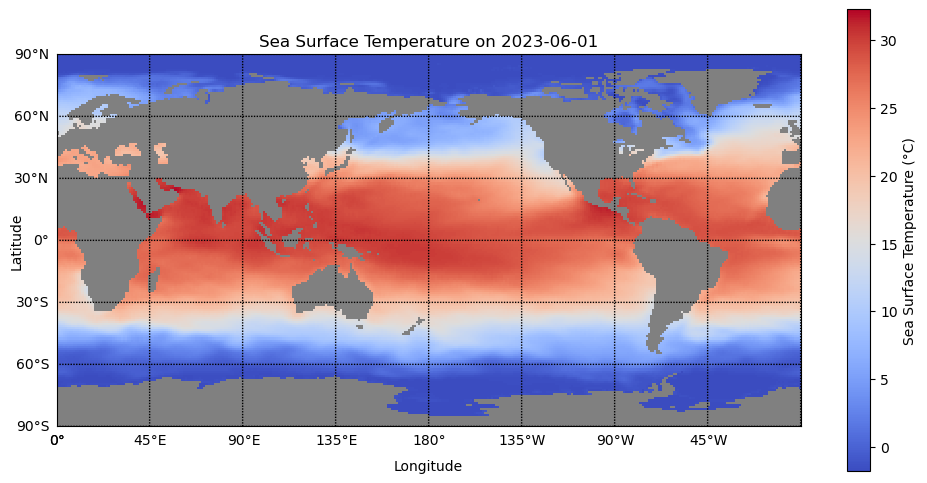

In [12]:
import numpy as np
from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import datetime

# Replace 'your_file.nc' with the actual NetCDF file path
nc_file = '/Users/Adrian/Downloads/sst.mon.mean.nc'

# Specify the date you're interested in (format: 'YYYY-MM-DD')
target_date = '2023-06-01'

# Open the NetCDF file
nc = Dataset(nc_file, 'r')

# Access the sea surface temperature (SST) data variable (e.g., 'sst')
sst_data = nc.variables['sst']

# Get time values
time_var = nc.variables['time']

# Convert time values to datetime objects using num2date
time_units = time_var.units
time_values = np.array(time_var)
time_datetime = num2date(time_values, units=time_units, calendar='standard')

# Convert the target date to a datetime object
target_datetime = datetime.datetime.strptime(target_date, '%Y-%m-%d')

# Find the index corresponding to the nearest date
time_index = np.argmin(np.abs(time_datetime - target_datetime))

# Extract the SST data for the specified date
sst_at_date = sst_data[time_index, :, :]

# Create a Basemap object for a global projection
plt.figure(figsize=(12, 6))
m = Basemap(projection='cyl', resolution='l', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360)

# Create a grid of latitude and longitude values
lon = np.array(nc.variables['lon'])
lat = np.array(nc.variables['lat'])

# Colormaps and colorbar can be customized as needed
cmap = plt.get_cmap('coolwarm')
cmap.set_bad('grey')
m.pcolormesh(lon, lat, sst_at_date, shading='auto', cmap=cmap, latlon=True, zorder=0)

# Plot the SST data on the map
#m.drawcoastlines()
#m.drawcountries()
m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1])

# Add a colorbar
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('Sea Surface Temperature (°C)')

# Add a title
plt.title(f'Sea Surface Temperature on {target_date}')
plt.xlabel('Longitude', labelpad=20)
plt.ylabel('Latitude', labelpad=20)

# Show the plot
plt.show()

# Close the NetCDF file
nc.close()


### Assignment 6. Interactive SST plot

Create an interactive plot of the whole SST timeseries, with a slider that allows you to scan through time. Make sure the title of the plot always reflects the month and year currently displayed (you'll have to work with the 'time' component of the NetCDF file. It is expressed as "days since 1891-01-01", so you will need to convert this into a nicer format. Check out the end of the matplotlib-help file for a clue on this!

Also, it may be clearer if you set the colorbar to have a fixed range so you can more easily see changes in the temperature over time. Use plt.clim() or ax.set_clim().

<i>To create an interactive plot of the whole sea surface temperature (SST) time series with a slider for time navigation and a dynamic title, you can use libraries like matplotlib, netCDF4, and ipywidgets.</i>


In [ ]:
pip install netCDF4 numpy matplotlib ipywidgets

In [13]:
import numpy as np
from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import datetime


# Function to update the plot and title based on the selected time index
def update_plot(time_index):
    # Open the NetCDF file
    nc = Dataset('/Users/Adrian/Downloads/sst.mon.mean.nc', 'r')

    # Access the sea surface temperature (SST) data variable (e.g., 'sst')
    sst_data = nc.variables['sst']

    # Get time values and convert them to datetime objects
    time_var = nc.variables['time']
    time_units = time_var.units
    time_values = np.array(time_var)
    time_datetime = num2date(time_values, units=time_units, calendar='standard')

    # Convert the time values to a more readable format
    time_readable = [datetime.datetime(1891, 1, 1) + datetime.timedelta(days=int(day)) for day in time_values]

    plt.figure(figsize=(12, 6))
    m = Basemap(projection='cyl', resolution='l', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360)

    lon = np.array(nc.variables['lon'])
    lat = np.array(nc.variables['lat'])

    m.drawcoastlines(linewidth=0.5, color='black', zorder=10)
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0], zorder=9)
    m.drawmeridians(np.arange(0., 361., 45.), labels=[0, 0, 0, 1], zorder=9)

    cmap = plt.get_cmap('coolwarm')
    cmap.set_bad('gray')
    m.pcolormesh(lon, lat, sst_data[time_index, :, :], shading='auto', cmap=cmap, latlon=True, zorder=0)

    cbar = plt.colorbar(orientation='vertical')
    cbar.set_label('Sea Surface Temperature (°C)')

    plt.title(f'Sea Surface Temperature - {time_readable[time_index].strftime("%B %Y")}')
    plt.xlabel('Longitude', labelpad=20)
    plt.ylabel('Latitude', labelpad=20)
    
    plt.show()

    # Close the NetCDF file
    nc.close()

# Create a slider widget for time selection
time_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(time_datetime) - 1,
    description='Time Index:',
    continuous_update=False,
)

# Create the interactive plot
interact(update_plot, time_index=time_slider)

# Display the initial plot
#update_plot(0)


interactive(children=(IntSlider(value=0, continuous_update=False, description='Time Index:', max=1589), Output…

<function __main__.update_plot(time_index)>